Name - Sakshi Patadiya

ID - 202101469

Course - IT496

Date - 20-08-2023

### **The largest diamond dataset currently on Kaggle**

### **1. EDA (Exploratory Data Analysis)**

In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we need to extract the content from the csv file and store it in a variable (data frame) for further use and experiments.

In [31]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [32]:
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

These are the names of the columns/features present in the diamonds dataframe.

In [33]:
df.shape

(219703, 26)

In [34]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


Now, we are using the inbuilt 'describe' function which generates a summary of basic statistics for each numerical column in the DataFrame like count, mean, standard deviation, minimum, 25th Percentile, meadian, 75th percentile and maximum. This values can be used in plotting the Box Plots.

In [35]:
numeric_col = df.select_dtypes(include='number')
numeric_col

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0,0.09,62.7,59.0,2.85,2.87,1.79,200
1,1,0.09,61.9,59.0,2.84,2.89,1.78,200
2,2,0.09,61.1,59.0,2.88,2.90,1.77,200
3,3,0.09,62.0,59.0,2.86,2.88,1.78,200
4,4,0.09,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...
219698,219699,10.65,61.3,58.0,14.06,14.18,8.66,1210692
219699,219700,5.17,64.8,65.0,11.55,8.81,5.71,1292500
219700,219701,18.07,60.2,59.0,17.06,17.10,10.20,1315496
219701,219702,0.90,70.8,72.0,5.22,4.90,3.47,1350000


**Now, plotting the boxplot for several features which are numberical in nature.**

A Box plot is a way to visualize the distribution of the data by using a box and some vertical lines. It is known as the whisker plot. The data can be distributed between five key ranges, which are as follows:

- Minimum: Q1-1.5*IQR
- 1st quartile (Q1): 25th percentile
- Median:50th percentile
- 3rd quartile(Q3):75th percentile
- Maximum: Q3+1.5*IQR
- Here IQR represents the InterQuartile Range which starts from the first quartile (Q1) and ends at the third quartile (Q3).

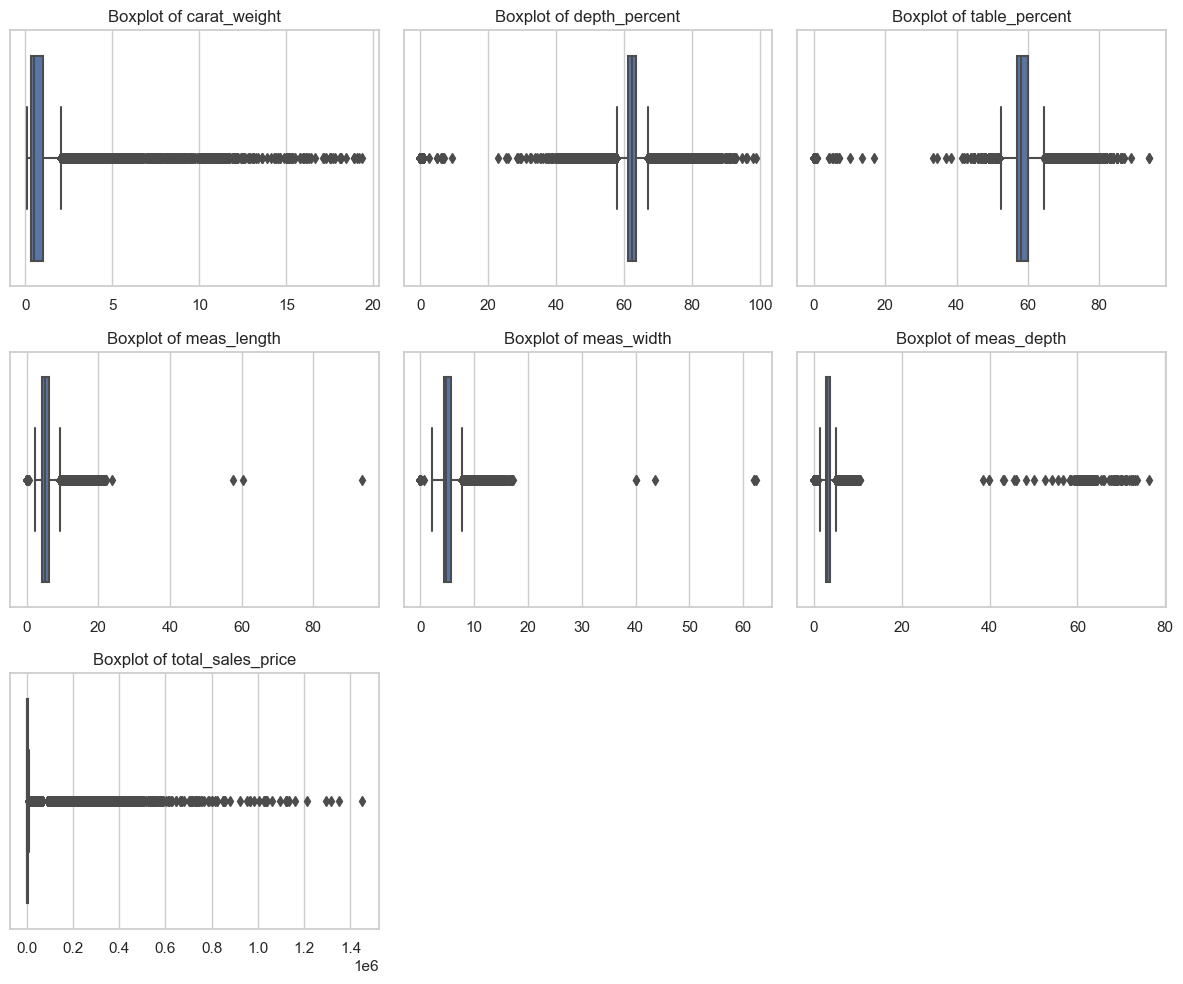

In [36]:
sns.set_theme(style="whitegrid")

# Creating a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# List of numeric columns for creating boxplots
numeric_columns = ["carat_weight", "depth_percent", "table_percent",
                   "meas_length", "meas_width", "meas_depth",
                   "total_sales_price"]

# Creating boxplots for each numeric column
for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1st Plot: "carat_weight"

*   Carat Weight refers to the mass of the diamond. Hence, it depicts that the carat weight is skewed and maximum values is concentrated between 0 to 2. There are lot of outliers points.


2nd Plot: "depth_percent"

*   Depth Percent is the relative measurements of the depth of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 60 to 65 roughly. There are outlier points on both sides of the centralized data.



3rd Plot: "table_percent"


*   Table Percent is the relative measurements of the flat part of the top of the diamonds. This is partially symmetric data, and most of the values are concentrated in between 56 to 61 roughly. There are outlier points on both sides of the centralized data.


4th Plot: "meas_length"


*   The "meas _ength" for a diamond refers to the measured length of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points.

5th Plot: "meas_width"


*   The "meas_width" typically refers to the width of the diamond when viewed from the top. This is skewed data, where most of the values are concentrated in between 2 to 8 roughly. There are very few outlier points in this case too.

6th Plot: "meas_depth"


*   The "meas_depth" of a diamond is measured from the table (the flat top surface of the diamond) to the culet (the pointed bottom tip of the diamond). This is skewed data, where most of the values are concentrated in between 1 to 5 roughly. It have few outlier points.

7th Plot: "total_sales_price"


*   It tells about the final prices of the diamonds in dollars based on its physical characteristics. This is highly skewed data, where maximum values are concentrated around $10000 roughly. It has a high number of outlier points.




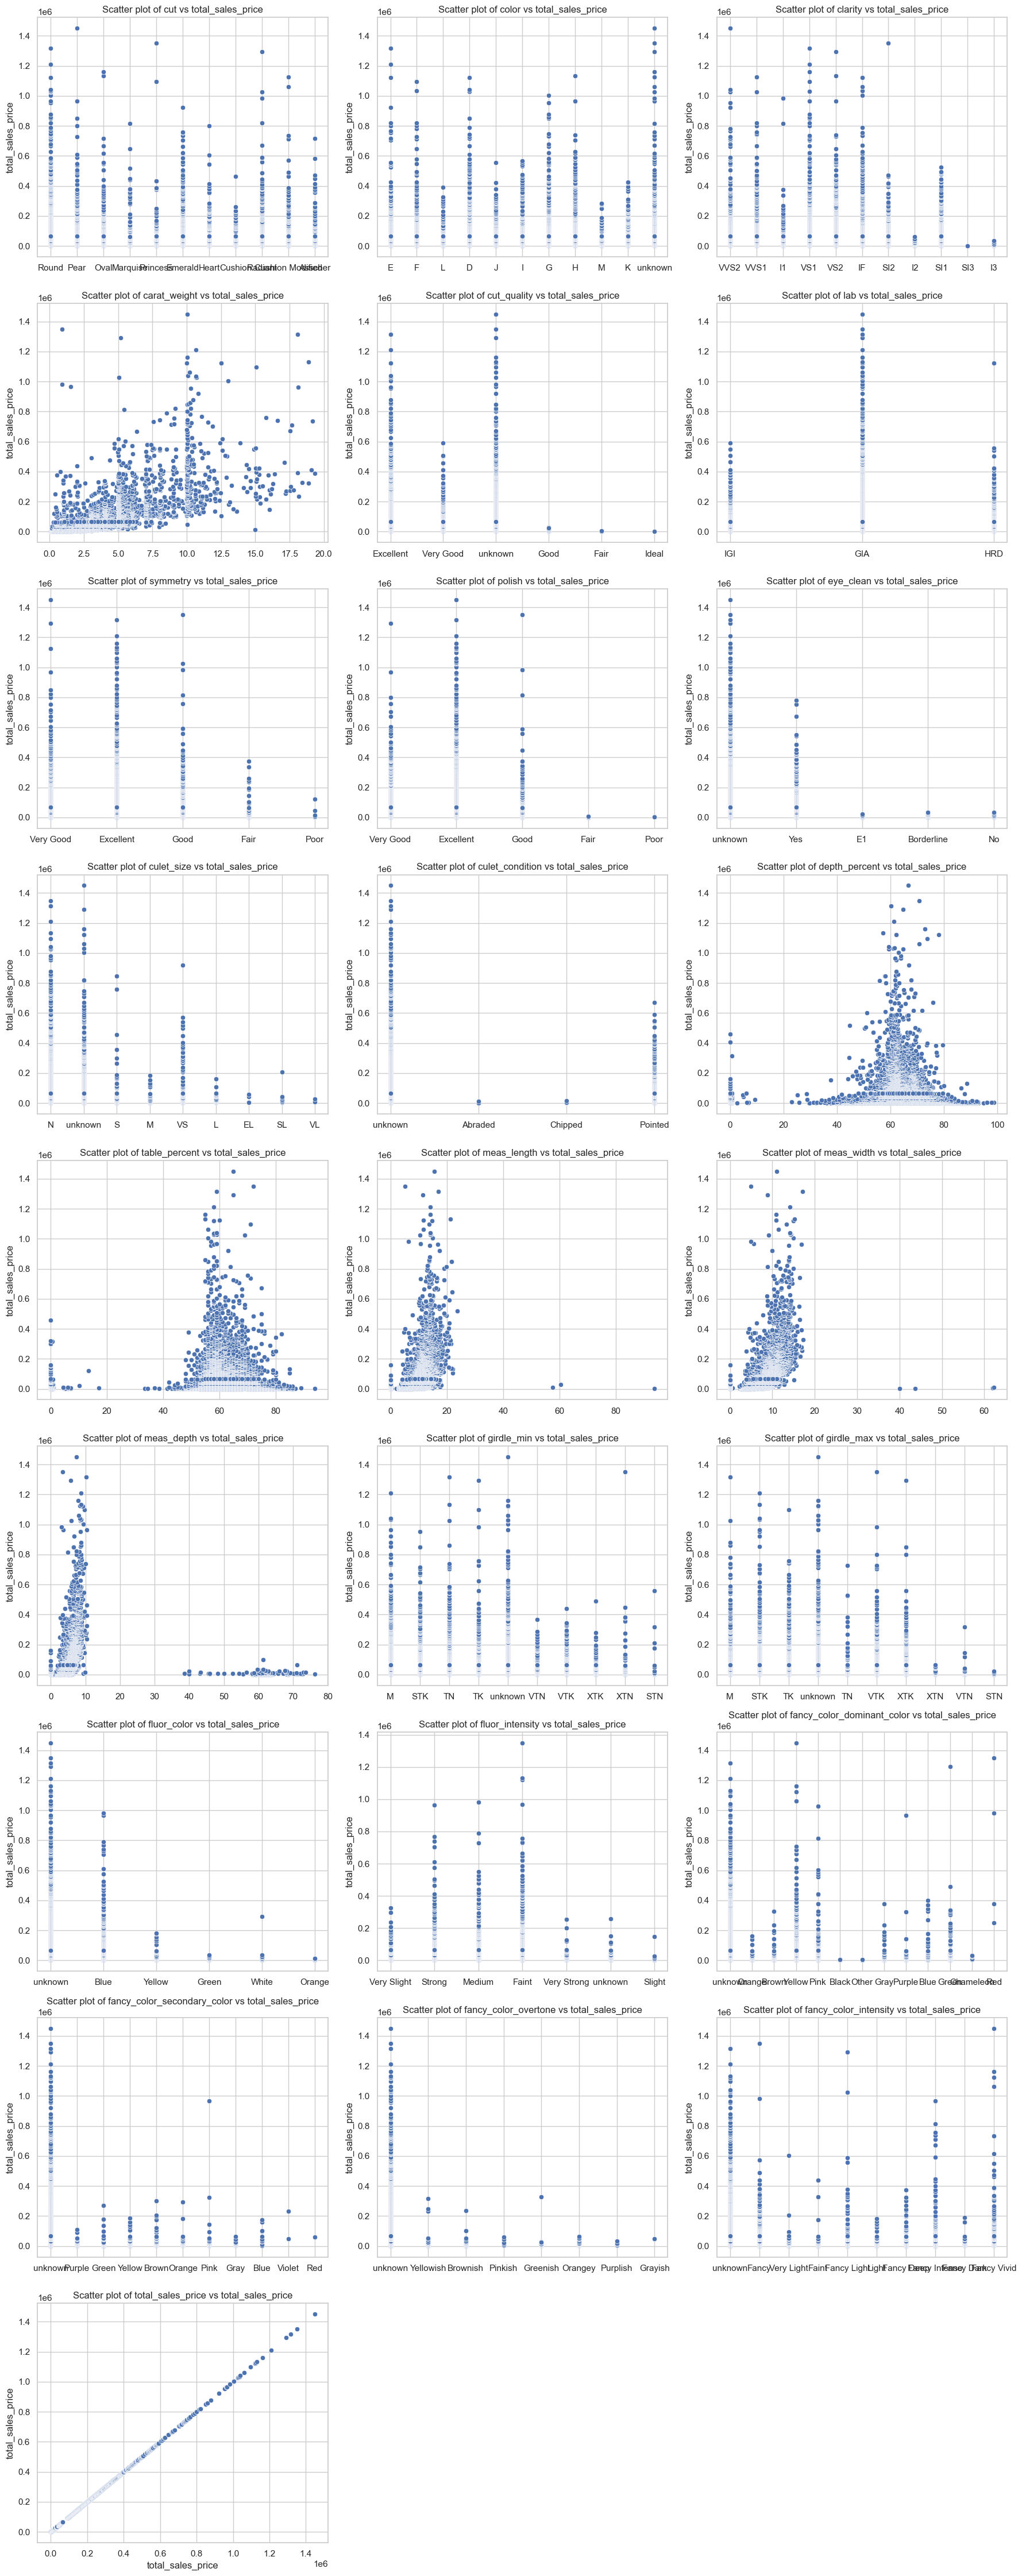

In [37]:
sns.set_theme(style="whitegrid")

# Plotting all the plots of every feature with respect to the total_sales_prie
y_column = "total_sales_price"

# List of columns/features to be plotted on the x-axis
x_columns = ["cut", "color", "clarity","carat_weight","cut_quality","lab","symmetry",
             "polish","eye_clean","culet_size","culet_condition","depth_percent","table_percent",
             "meas_length","meas_width","meas_depth","girdle_min","girdle_max","fluor_color",
             "fluor_intensity","fancy_color_dominant_color","fancy_color_secondary_color",
             "fancy_color_overtone","fancy_color_intensity","total_sales_price"]

# the total number of scatter plots
num_plots = len(x_columns)

# number of rows required to present 3 plots in each row
num_rows = (num_plots + 2) // 3  # Each row will have 3 plots

# Creating subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# Loop through the x columns and create scatter plots
for i, x_col in enumerate(x_columns):
    sns.scatterplot(x=df[x_col], y=df[y_column], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_col} vs {y_column}')

    # Remove x-axis label from all but the last row
    if i < (num_rows - 1) * 3:
        axes[i].set_xlabel('')

# Remove last 2 unused subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

This are the scatter plots of all the features with respect to the "total_sales_price". All of these depicts how a particular feature varies with respect to the total price of the diamonds. The features includes numerical as well as categorical data.

We can observe from the first three plots that cut, color and clarity varies symmetrically with the total sales price and have very few outlier points which affects the total prices.

The cut_quality data is skewed with respect to total sale price. In the "lab" feature, we see that the diamond with the lab certificate of the GIA has higher sales price than the others. The carat_weight which is numerical in nature seems to be distributed with the sales price of the diamonds.

In the symmetry and polish feature, people like to have diamonds which have very good or excellent symmetry in them and are excellently polished. The eye_clean features seems to be unknown in maximum cases. And people tend to have only the diamonds with great blemishes or inclusions that can be seen with a the naked eye.

The culet_size seems to be varying highly as it affects the amount of light that gets reflected which varies from diamond to diamond. The culet_condition is unknown in maximum cases.

The depth_percent and table_percent are the relative measurements of the flat part of the top and the depth. The meas_length, meas_width, meas_depth are the absolute measurements of diamonds. All these properties seems to be concentrated among a range of values which determines the total sales price for a diamond.

When looking at a diamond from the top, the girdle is the part of the stone that creates the outline. From the side, the girdle separates the pavilion, or bottom, from the crown, the set of facets around the top. The girdle_min and girdle_max seems to be distributed in the data.

The fluor_color is unknown in maximum cases and the fluor_intensity is NONE in majority of cases. In all the next plots, in the majority cases the value is UNKNOWN, hence these features contributes very minimal in determining the prices of the diamonds.

In [38]:
df.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

There are no columns where the data value is NULL.

In [39]:
for column in df.columns:
    nullvaluesindataset = (df[column] == "unknown").sum()
    print(f"{column} : {nullvaluesindataset}")

Unnamed: 0 : 0
cut : 0
color : 9162
clarity : 0
carat_weight : 0
cut_quality : 60607
lab : 0
symmetry : 0
polish : 0
eye_clean : 156916
culet_size : 85740
culet_condition : 204384
depth_percent : 0
table_percent : 0
meas_length : 0
meas_width : 0
meas_depth : 0
girdle_min : 83432
girdle_max : 84295
fluor_color : 203977
fluor_intensity : 128
fancy_color_dominant_color : 210539
fancy_color_secondary_color : 218641
fancy_color_overtone : 217665
fancy_color_intensity : 210541
total_sales_price : 0


There are several columns where the value is UNKNOWN, hence that particular features doesn't affect or contribute in predicting the total sales price of the diamond.

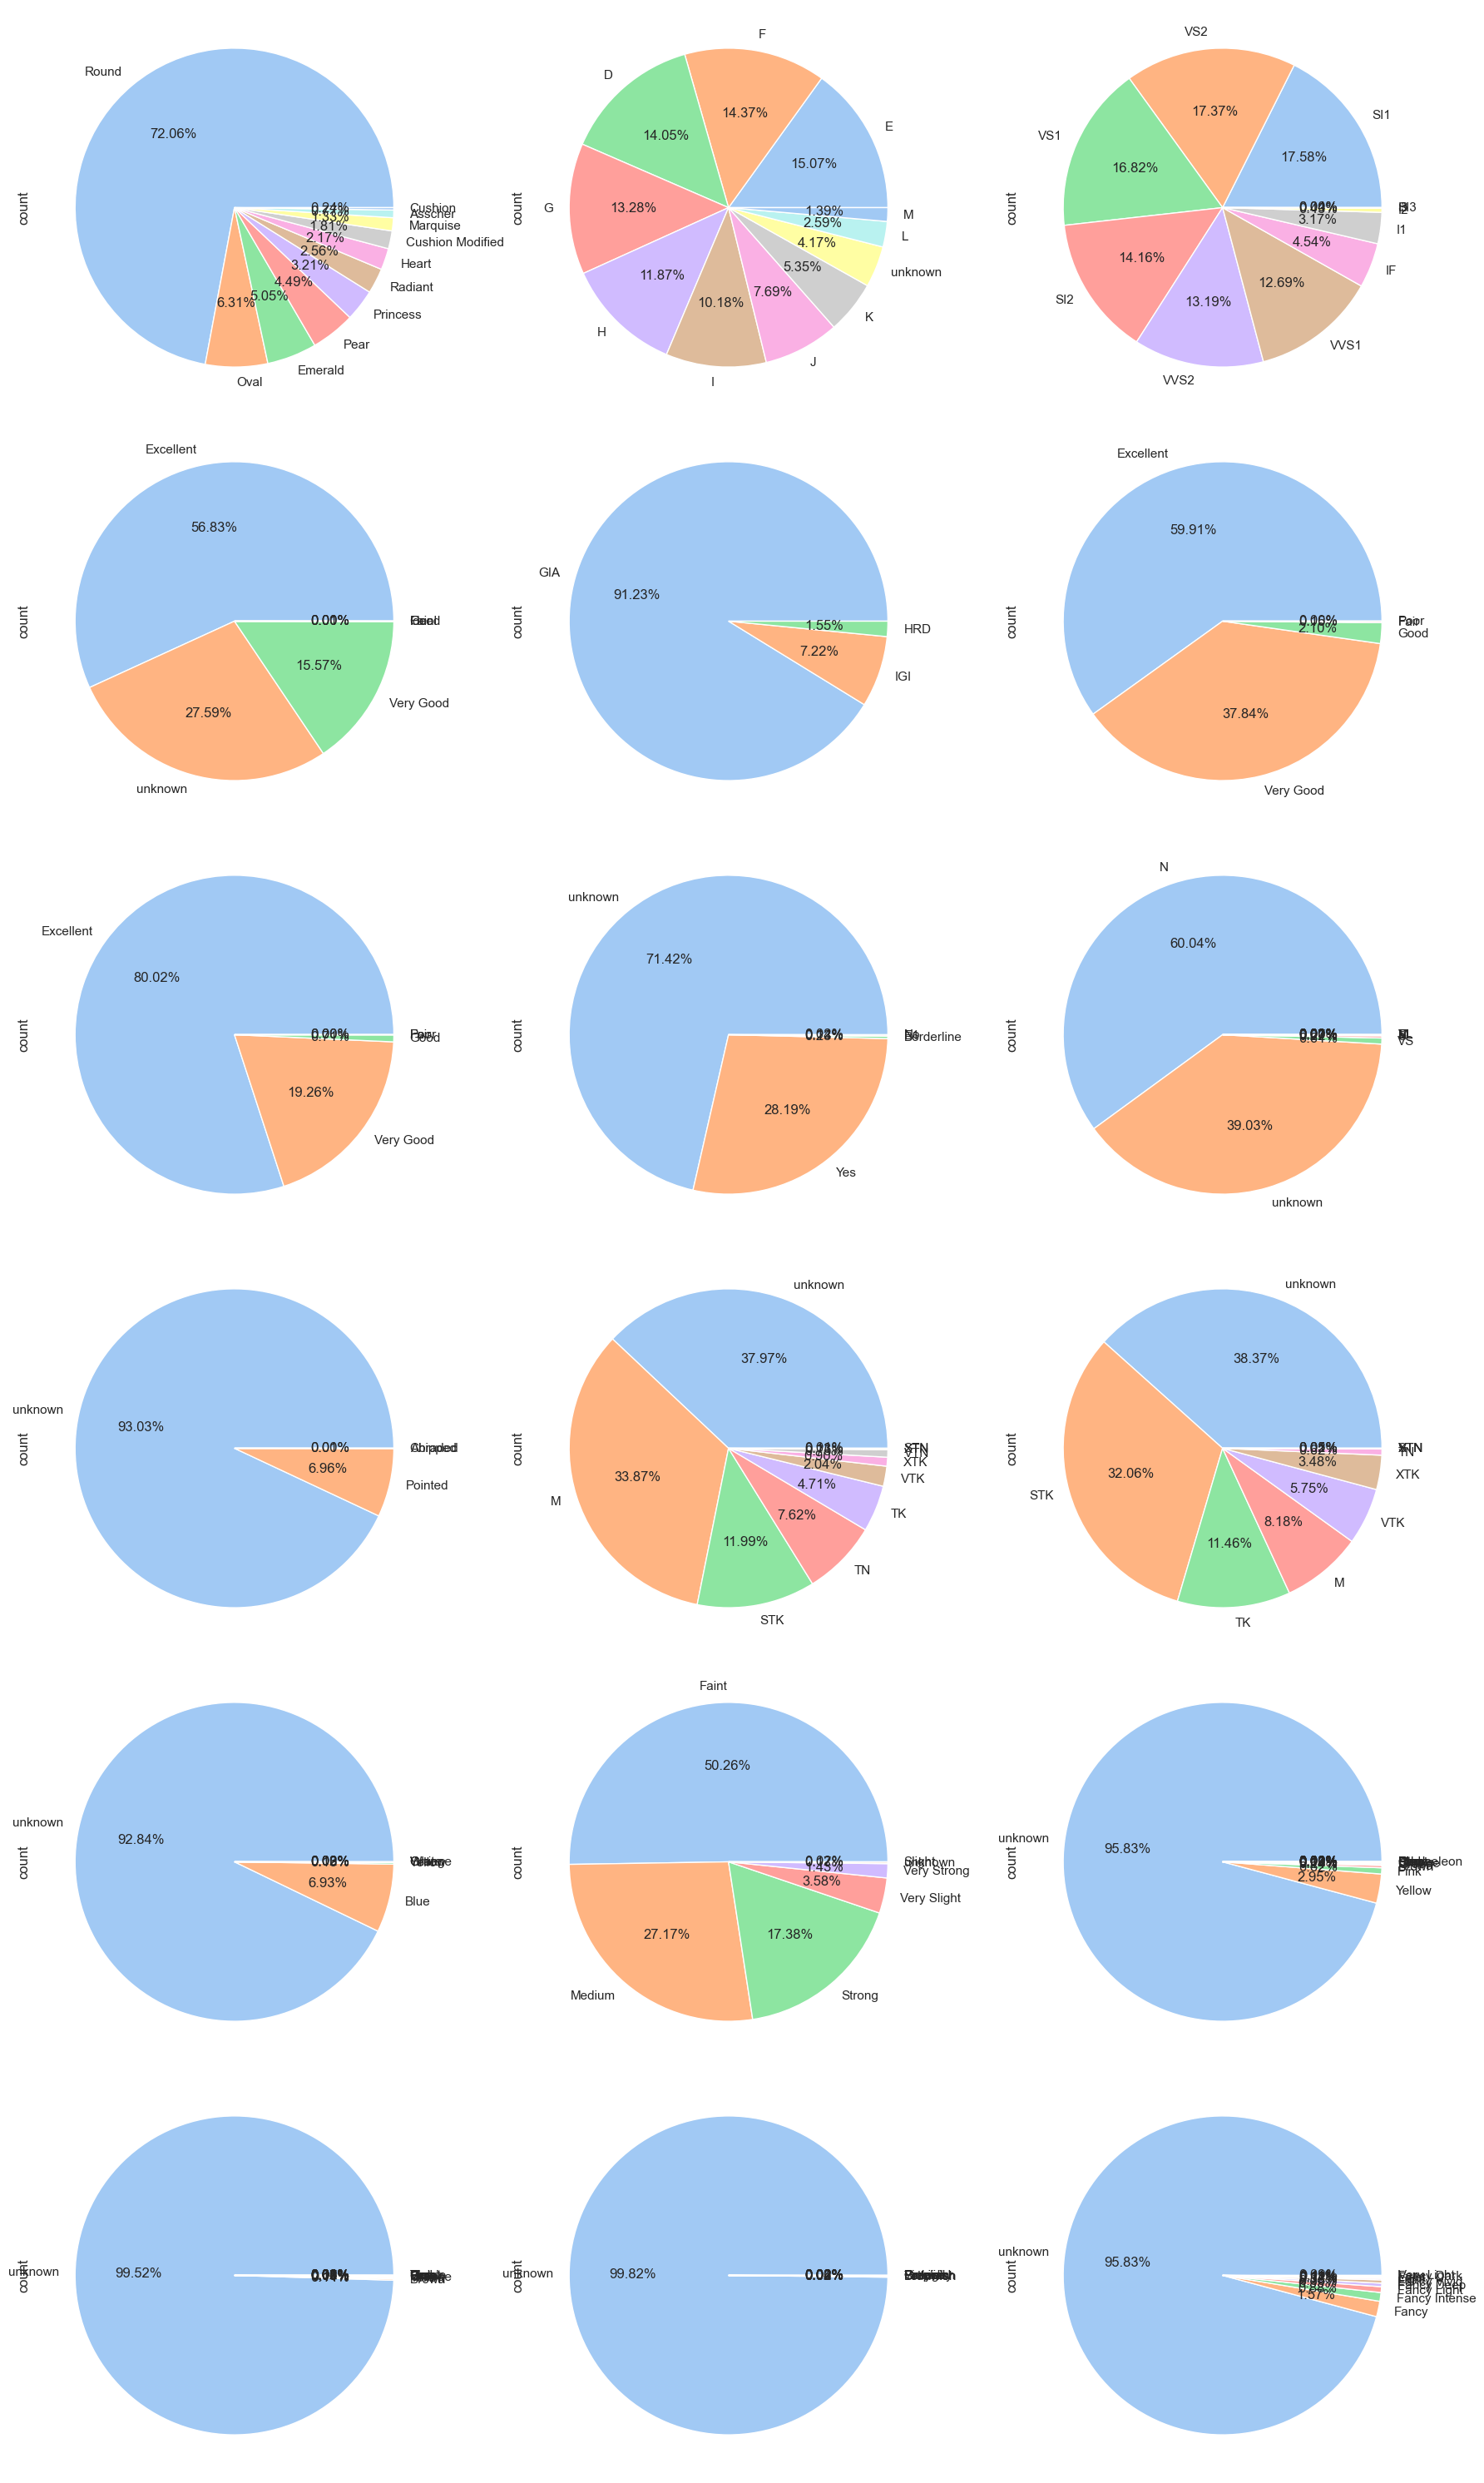

In [40]:
# Filter out only categorical columns from the list
categorical_columns = [col for col in x_columns if df[col].dtype == 'object']

# the total number of pie charts
num_plots = len(categorical_columns)

# number of rows required to present 3 pie charts in each row
num_rows = (num_plots + 2) // 3  # Each row will have 3 pie charts

# Creating subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    col_dist = df[col].value_counts()
    pie_colors = sns.color_palette('pastel')[:len(col_dist)]  # Using pastel colors for the pie chart
    col_dist.plot(kind='pie', colors=pie_colors, autopct='%1.2f%%', ax=axes[i])
    #axes[i].set_title(col)  # Set the subplot title to the column name

# Remove last unused subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Here, we have plotted the pie charts of all the categorical data or features present in our data frame.

In the cut feature, the round property dominates in maximum cases. The color and the clarity features, seems to be distributed well enough among all of its types or properties.

The cut_quality, polish and the symmetry property needs to be excellent for maximum of the cases. The maximum cases are of the GIA Lab which gives lab certificate.

The culet_size is N for more than 50% of the cases but culet_condition is unknown in majority of the cases. The fluor_intensity is NONE in majority of the cases.

The eye_clean, fluor_color, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone and fancy_color_intensity is UNKNOWN for around 90% of the cases. Hence, these properties do not contribute for the prediction or analysis of the total sales price.

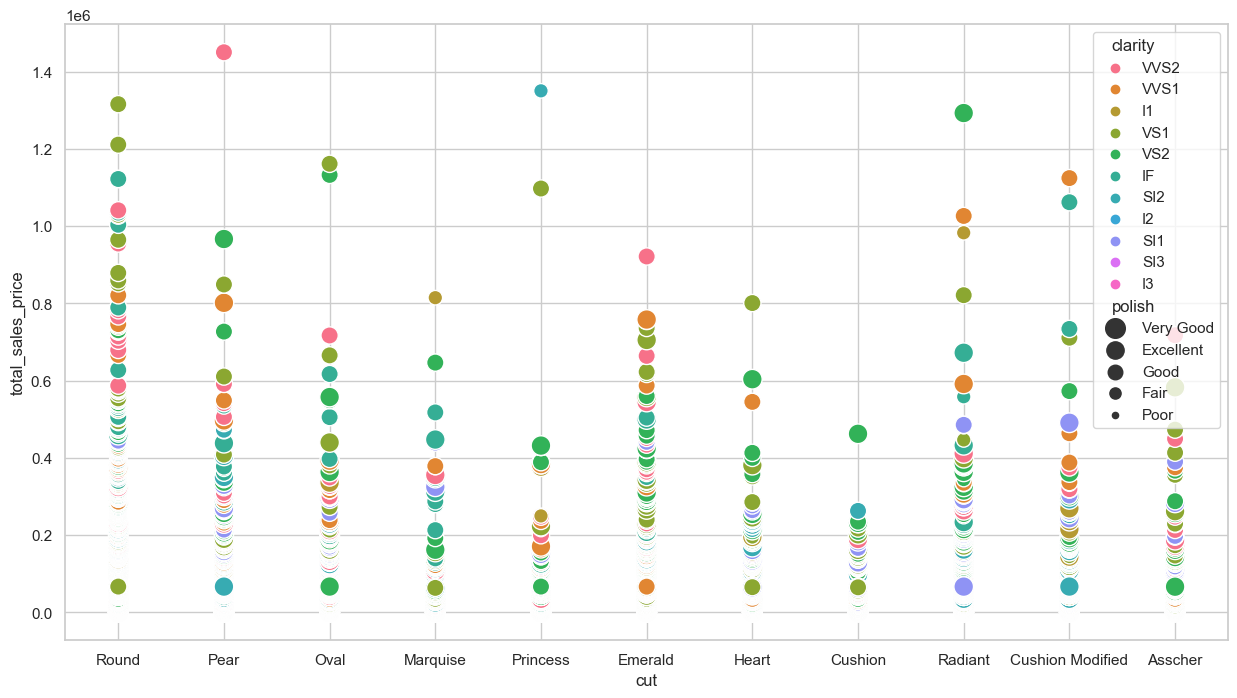

In [41]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["cut"], y=df["total_sales_price"], hue=df["clarity"], size=df["polish"], sizes=(20, 200), legend="full")

This plot is between total_sales_price and cut features of the diamond. The different colors or the hue represents the clarity feature of the diamond which seems to be evenly spreaded for all the clarity types. The size of the dots represents the polish nature of the diamond which seems to vary only between Very Good and Excellent types.

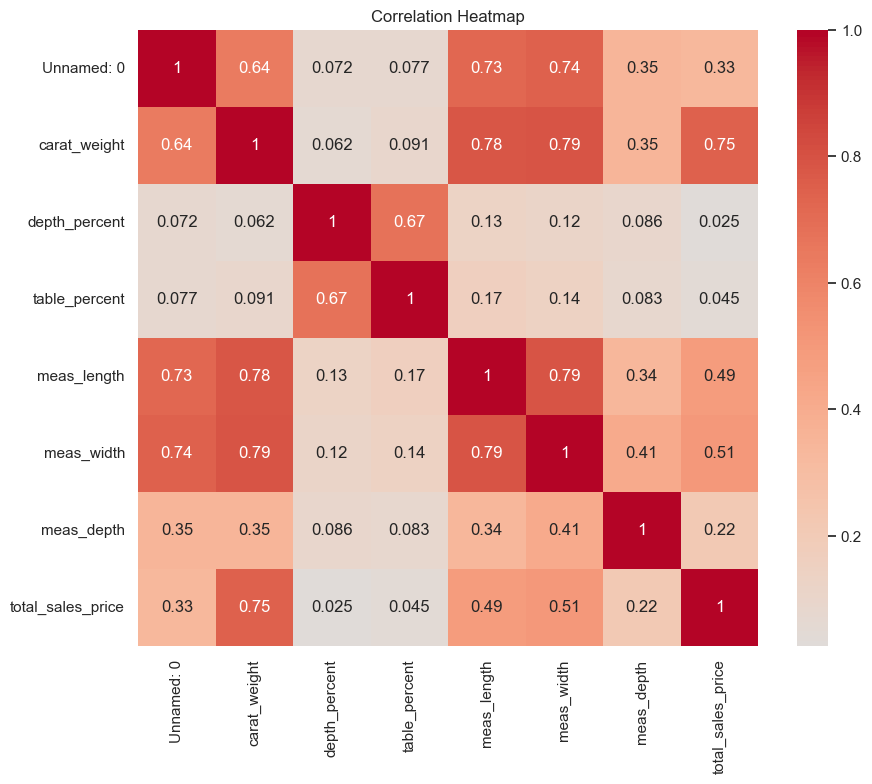

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = [col for col in x_columns if df[col].dtype == 'object']
categorical_columns
df = df.drop(['cut',
                'color',
                'clarity',
                'cut_quality',
                'lab',
                'symmetry',
                'polish',
                'eye_clean',
                'culet_size',
                'culet_condition',
                'girdle_min',
                'girdle_max',
                'fluor_color',
                'fluor_intensity',
                'fancy_color_dominant_color',
                'fancy_color_secondary_color',
                'fancy_color_overtone',
                'fancy_color_intensity'],axis=1)

# Calculate a correlation matrix
correlation_matrix = df.corr()

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()


As the correlation varies only between 0 to 1, there is positive correlation between all of its features. Hence, due to absence of negetive correlation, the scaling is only on the positive axis, i.e., 0 to 1. As some of the features have correlation great than 0.5, I have plotted their scatter graphs to understand the correlation well among them.

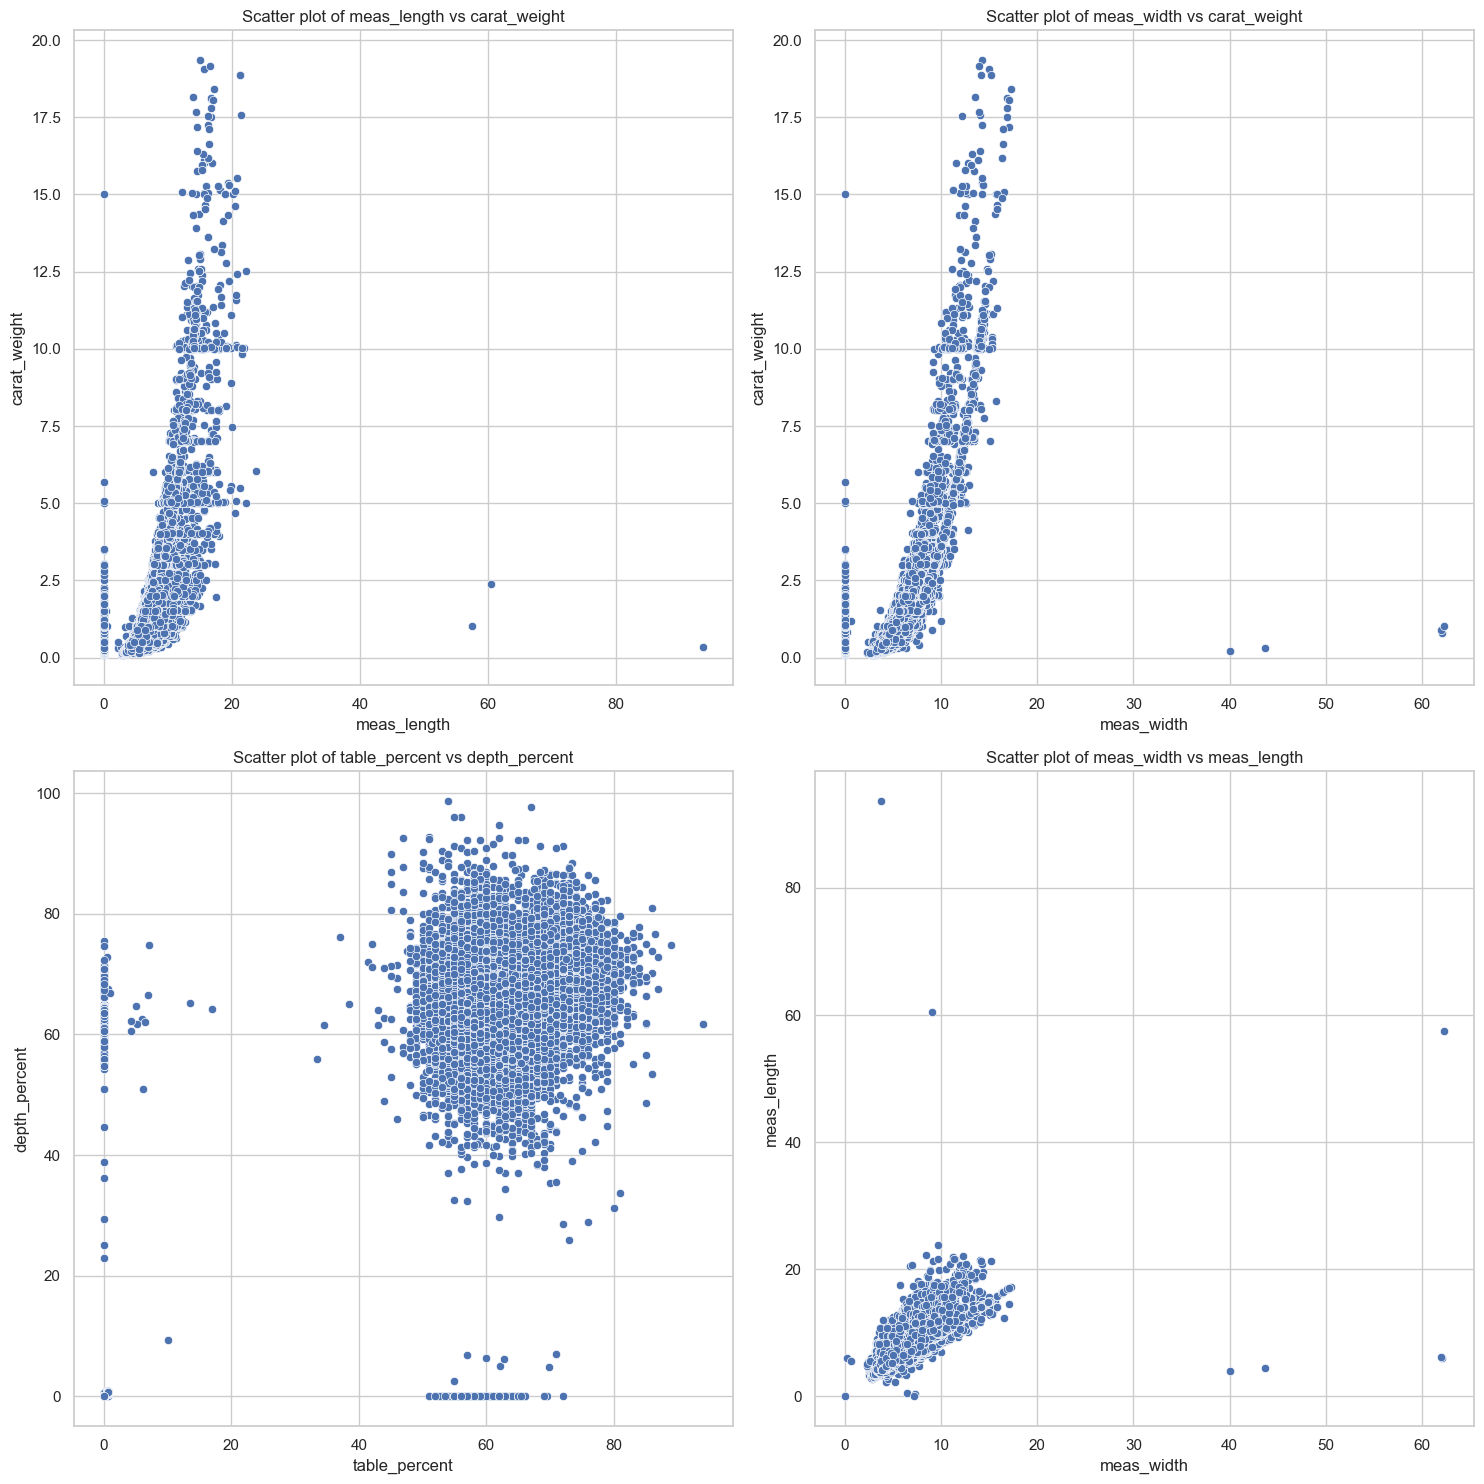

In [43]:
sns.set_theme(style="whitegrid")

# Plotting all the plots of every feature with respect to the total_sales_prie
y_column = ["carat_weight","carat_weight","depth_percent","meas_length"]

x_column = ["meas_length", "meas_width", "table_percent","meas_width"]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

sns.scatterplot(x=df[x_column[0]], y=df[y_column[0]], ax=axes[0])
axes[0].set_title(f'Scatter plot of {x_column[0]} vs {y_column[0]}')

sns.scatterplot(x=df[x_column[1]], y=df[y_column[1]], ax=axes[1])
axes[1].set_title(f'Scatter plot of {x_column[1]} vs {y_column[1]}')

sns.scatterplot(x=df[x_column[2]], y=df[y_column[2]], ax=axes[2])
axes[2].set_title(f'Scatter plot of {x_column[2]} vs {y_column[2]}')

sns.scatterplot(x=df[x_column[3]], y=df[y_column[3]], ax=axes[3])
axes[3].set_title(f'Scatter plot of {x_column[3]} vs {y_column[3]}')

plt.tight_layout()
plt.show()

These graphs shows how the two features across which he graph is plotted varies with respect to each other.
There is a linear relationship between carat_weight and meas_length, as well as in between carat_weight and meas_width.